<a href="https://colab.research.google.com/github/AFBA1993/DeepLearningTutorials/blob/main/CNNmnist/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D


In [18]:
pip install keras-layer-normalization

  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.15.0-py3-none-any.whl size=5224 sha256=3f7b3859b9c24ed4af12038aa6eb768a895b6cdf7abb261f3ba7708eb63a382c
  Stored in directory: /root/.cache/pip/wheels/4d/be/fe/55422f77ac11fe6ddcb471198038de8a26b5a4dd1557883c1e
Successfully built keras-layer-normalization


In [20]:
from keras.layers import BatchNormalization

In [2]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


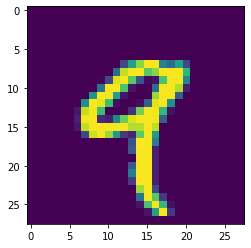

In [3]:
plt.imshow(X_treinamento[4])

In [4]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 
                                               28, 28, 1)

In [5]:
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [6]:
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

In [7]:
previsores_treinamento /= 255
previsores_teste /= 255

In [8]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

In [33]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), input_shape = (28, 28, 1),
                         activation = 'relu'))

classificador.add(BatchNormalization())

classificador.add(MaxPooling2D(pool_size = (2,2)))
#classificador.add(Flatten())

classificador.add(Conv2D(32, (3,3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))
classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10, activation = 'softmax'))
classificador.add(Dropout(0.2))

classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])

In [34]:
classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 128, epochs = 5,
                  validation_data = (previsores_teste, classe_teste))

Epoch 1/5
469/469 [==============================] - 55s 116ms/step - loss: 3.3569 - accuracy: 0.7582 - val_loss: 0.1356 - val_accuracy: 0.9654
Epoch 2/5
469/469 [==============================] - 54s 116ms/step - loss: 3.2417 - accuracy: 0.7886 - val_loss: 0.0418 - val_accuracy: 0.9866
Epoch 3/5
469/469 [==============================] - 54s 116ms/step - loss: 3.2380 - accuracy: 0.7917 - val_loss: 0.0421 - val_accuracy: 0.9875
Epoch 4/5
469/469 [==============================] - 54s 116ms/step - loss: 3.2810 - accuracy: 0.7901 - val_loss: 0.0396 - val_accuracy: 0.9867
Epoch 5/5
469/469 [==============================] - 55s 117ms/step - loss: 3.3120 - accuracy: 0.7892 - val_loss: 0.0365 - val_accuracy: 0.9899


In [35]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

313/313 [==============================] - 3s 11ms/step - loss: 0.0365 - accuracy: 0.9899


In [36]:
resultado

[0.03647742420434952, 0.9898999929428101]